In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
from matplotlib import pyplot
from keras.optimizers import SGD
np.set_printoptions(threshold=np.sys.maxsize) 

/Users/omristeinberg-tatman/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#define the data
FullData = pd.read_csv("ALU_Correction_Data.csv")

for item in range(0,len(FullData)):
    FullData.loc[item,"carry"] = str(FullData.loc[item,"carry"])

x, y = FullData.values[:, 2:-6], FullData.values[:, -6:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3333)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
n_features = x_train.shape[1]

(109232, 14) (54608, 14) (109232, 6) (54608, 6)


In [3]:
y_train

array([['1', '0', '1', '0', '0', '1'],
       ['1', '0', '0', '0', '0', '0'],
       ['1', '0', '1', '1', '0', '0'],
       ['1', '0', '1', '0', '0', '1'],
       ['0', '1', '1', '1', '1', '0'],
       ['0', '0', '0', '0', '0', '0'],
       ['1', '0', '1', '1', '1', '0'],
       ['0', '1', '1', '1', '1', '0'],
       ['0', '1', '1', '1', '1', '0'],
       ['0', '0', '1', '0', '0', '0'],
       ['0', '0', '0', '0', '0', '0'],
       ['0', '1', '0', '1', '0', '0'],
       ['1', '1', '0', '1', '0', '0'],
       ['0', '0', '0', '0', '0', '0'],
       ['0', '0', '0', '0', '0', '0'],
       ['0', '1', '1', '1', '1', '0'],
       ['1', '0', '1', '1', '1', '0'],
       ['1', '1', '0', '1', '0', '0'],
       ['0', '0', '0', '0', '1', '0'],
       ['0', '0', '0', '0', '1', '0'],
       ['0', '0', '0', '0', '0', '0'],
       ['1', '1', '1', '1', '0', '0'],
       ['1', '1', '1', '1', '0', '0'],
       ['1', '0', '0', '0', '0', '1'],
       ['0', '0', '1', '0', '0', '0'],
       ['0', '0', '0', '0

In [13]:
outtypetrain = []
outtypetest = []

for item in range(0,len(y_train)):
    outtypetrain.append(y_train[item][0] + y_train[item][1] + y_train[item][2] + y_train[item][3] + y_train[item][4] + y_train[item][5])
    
for item in range(0,len(y_test)):  
    outtypetest.append(y_test[item][0] + y_test[item][1] + y_test[item][2] + y_test[item][3] + y_test[item][4] + y_test[item][5])

In [14]:
y_trainpreclass = outtypetrain
y_testpreclass = outtypetest

for item in range(0,len(y_train)):
    if(outtypetrain[item] == '000000'):
        y_trainpreclass[item] = 0
    elif(outtypetrain[item] == '000001'):
        y_trainpreclass[item] = 1
    elif(outtypetrain[item] == '000010'):
        y_trainpreclass[item] = 2
    elif(outtypetrain[item] == '000011'):
        y_trainpreclass[item] = 3
    elif(outtypetrain[item] == '000100'):
        y_trainpreclass[item] = 4
    elif(outtypetrain[item] == '000101'):
        y_trainpreclass[item] = 5
    elif(outtypetrain[item] == '000110'):
        y_trainpreclass[item] = 6
    elif(outtypetrain[item] == '000111'):
        y_trainpreclass[item] = 7
    elif(outtypetrain[item] == '001000'):
        y_trainpreclass[item] = 8
    elif(outtypetrain[item] == '001001'):
        y_trainpreclass[item] = 9
    elif(outtypetrain[item] == '001010'):
        y_trainpreclass[item] = 10
    elif(outtypetrain[item] == '001011'):
        y_trainpreclass[item] = 11
    elif(outtypetrain[item] == '001100'):
        y_trainpreclass[item] = 12
    elif(outtypetrain[item] == '001101'):
        y_trainpreclass[item] = 13
    elif(outtypetrain[item] == '001110'):
        y_trainpreclass[item] = 14
    elif(outtypetrain[item] == '001111'):
        y_trainpreclass[item] = 15
    elif(outtypetrain[item] == '010000'):
        y_trainpreclass[item] = 16
    elif(outtypetrain[item] == '010001'):
        y_trainpreclass[item] = 17
    elif(outtypetrain[item] == '010010'):
        y_trainpreclass[item] = 18
    elif(outtypetrain[item] == '010011'):
        y_trainpreclass[item] = 19
    elif(outtypetrain[item] == '010100'):
        y_trainpreclass[item] = 20
    elif(outtypetrain[item] == '010101'):
        y_trainpreclass[item] = 21
    elif(outtypetrain[item] == '010110'):
        y_trainpreclass[item] = 22
    elif(outtypetrain[item] == '010111'):
        y_trainpreclass[item] = 23
    elif(outtypetrain[item] == '011000'):
        y_trainpreclass[item] = 24
    elif(outtypetrain[item] == '011001'):
        y_trainpreclass[item] = 25
    elif(outtypetrain[item] == '011010'):
        y_trainpreclass[item] = 26
    elif(outtypetrain[item] == '011011'):
        y_trainpreclass[item] = 27 
    elif(outtypetrain[item] == '011100'):
        y_trainpreclass[item] = 28
    elif(outtypetrain[item] == '011101'):
        y_trainpreclass[item] = 29
    elif(outtypetrain[item] == '011110'):
        y_trainpreclass[item] = 30
    elif(outtypetrain[item] == '011111'):
        y_trainpreclass[item] = 31
    elif(outtypetrain[item] == '100000'):
        y_trainpreclass[item] = 32
    elif(outtypetrain[item] == '100001'):
        y_trainpreclass[item] = 33
    elif(outtypetrain[item] == '100010'):
        y_trainpreclass[item] = 34
    elif(outtypetrain[item] == '100011'):
        y_trainpreclass[item] = 35
    elif(outtypetrain[item] == '100100'):
        y_trainpreclass[item] = 36
    elif(outtypetrain[item] == '100101'):
        y_trainpreclass[item] = 37
    elif(outtypetrain[item] == '100110'):
        y_trainpreclass[item] = 38
    elif(outtypetrain[item] == '100111'):
        y_trainpreclass[item] = 39
    elif(outtypetrain[item] == '101000'):
        y_trainpreclass[item] = 40
    elif(outtypetrain[item] == '101001'):
        y_trainpreclass[item] = 41
    elif(outtypetrain[item] == '101010'):
        y_trainpreclass[item] = 42
    elif(outtypetrain[item] == '101011'):
        y_trainpreclass[item] = 43
    elif(outtypetrain[item] == '101100'):
        y_trainpreclass[item] = 44
    elif(outtypetrain[item] == '101101'):
        y_trainpreclass[item] = 45
    elif(outtypetrain[item] == '101110'):
        y_trainpreclass[item] = 46
    elif(outtypetrain[item] == '101111'):
        y_trainpreclass[item] = 47
    elif(outtypetrain[item] == '110000'):
        y_trainpreclass[item] = 48
    elif(outtypetrain[item] == '110001'):
        y_trainpreclass[item] = 49
    elif(outtypetrain[item] == '110010'):
        y_trainpreclass[item] = 50
    elif(outtypetrain[item] == '110011'):
        y_trainpreclass[item] = 51
    elif(outtypetrain[item] == '110100'):
        y_trainpreclass[item] = 52
    elif(outtypetrain[item] == '110101'):
        y_trainpreclass[item] = 53
    elif(outtypetrain[item] == '110110'):
        y_trainpreclass[item] = 54
    elif(outtypetrain[item] == '110111'):
        y_trainpreclass[item] = 55
    elif(outtypetrain[item] == '111000'):
        y_trainpreclass[item] = 56
    elif(outtypetrain[item] == '111001'):
        y_trainpreclass[item] = 57
    elif(outtypetrain[item] == '111010'):
        y_trainpreclass[item] = 58
    elif(outtypetrain[item] == '111011'):
        y_trainpreclass[item] = 59
    elif(outtypetrain[item] == '111100'):
        y_trainpreclass[item] = 60
    elif(outtypetrain[item] == '111101'):
        y_trainpreclass[item] = 61
    elif(outtypetrain[item] == '111110'):
        y_trainpreclass[item] = 62
    elif(outtypetrain[item] == '111111'):
        y_trainpreclass[item] = 63
    elif(outtypetrain[item] == 'xxxxx0'):
        y_trainpreclass[item] = 64
    
for item in range(0,len(y_test)):
    if(outtypetest[item] == '000000'):
        y_testpreclass[item] = 0
    elif(outtypetest[item] == '000001'):
        y_testpreclass[item] = 1
    elif(outtypetest[item] == '000010'):
        y_testpreclass[item] = 2
    elif(outtypetest[item] == '000011'):
        y_testpreclass[item] = 3
    elif(outtypetest[item] == '000100'):
        y_testpreclass[item] = 4
    elif(outtypetest[item] == '000101'):
        y_testpreclass[item] = 5
    elif(outtypetest[item] == '000110'):
        y_testpreclass[item] = 6
    elif(outtypetest[item] == '000111'):
        y_testpreclass[item] = 7
    elif(outtypetest[item] == '001000'):
        y_testpreclass[item] = 8
    elif(outtypetest[item] == '001001'):
        y_testpreclass[item] = 9
    elif(outtypetest[item] == '001010'):
        y_testpreclass[item] = 10
    elif(outtypetest[item] == '001011'):
        y_testpreclass[item] = 11
    elif(outtypetest[item] == '001100'):
        y_testpreclass[item] = 12
    elif(outtypetest[item] == '001101'):
        y_testpreclass[item] = 13
    elif(outtypetest[item] == '001110'):
        y_testpreclass[item] = 14
    elif(outtypetest[item] == '001111'):
        y_testpreclass[item] = 15
    elif(outtypetest[item] == '010000'):
        y_testpreclass[item] = 16
    elif(outtypetest[item] == '010001'):
        y_testpreclass[item] = 17
    elif(outtypetest[item] == '010010'):
        y_testpreclass[item] = 18
    elif(outtypetest[item] == '010011'):
        y_testpreclass[item] = 19
    elif(outtypetest[item] == '010100'):
        y_testpreclass[item] = 20
    elif(outtypetest[item] == '010101'):
        y_testpreclass[item] = 21
    elif(outtypetest[item] == '010110'):
        y_testpreclass[item] = 22
    elif(outtypetest[item] == '010111'):
        y_testpreclass[item] = 23
    elif(outtypetest[item] == '011000'):
        y_testpreclass[item] = 24
    elif(outtypetest[item] == '011001'):
        y_testpreclass[item] = 25
    elif(outtypetest[item] == '011010'):
        y_testpreclass[item] = 26
    elif(outtypetest[item] == '011011'):
        y_testpreclass[item] = 27 
    elif(outtypetest[item] == '011100'):
        y_testpreclass[item] = 28
    elif(outtypetest[item] == '011101'):
        y_testpreclass[item] = 29
    elif(outtypetest[item] == '011110'):
        y_testpreclass[item] = 30
    elif(outtypetest[item] == '011111'):
        y_testpreclass[item] = 31
    elif(outtypetest[item] == '100000'):
        y_testpreclass[item] = 32
    elif(outtypetest[item] == '100001'):
        y_testpreclass[item] = 33
    elif(outtypetest[item] == '100010'):
        y_testpreclass[item] = 34
    elif(outtypetest[item] == '100011'):
        y_testpreclass[item] = 35
    elif(outtypetest[item] == '100100'):
        y_testpreclass[item] = 36
    elif(outtypetest[item] == '100101'):
        y_testpreclass[item] = 37
    elif(outtypetest[item] == '100110'):
        y_testpreclass[item] = 38
    elif(outtypetest[item] == '100111'):
        y_testpreclass[item] = 39
    elif(outtypetest[item] == '101000'):
        y_testpreclass[item] = 40
    elif(outtypetest[item] == '101001'):
        y_testpreclass[item] = 41
    elif(outtypetest[item] == '101010'):
        y_testpreclass[item] = 42
    elif(outtypetest[item] == '101011'):
        y_testpreclass[item] = 43
    elif(outtypetest[item] == '101100'):
        y_testpreclass[item] = 44
    elif(outtypetest[item] == '101101'):
        y_testpreclass[item] = 45
    elif(outtypetest[item] == '101110'):
        y_testpreclass[item] = 46
    elif(outtypetest[item] == '101111'):
        y_testpreclass[item] = 47
    elif(outtypetest[item] == '110000'):
        y_testpreclass[item] = 48
    elif(outtypetest[item] == '110001'):
        y_testpreclass[item] = 49
    elif(outtypetest[item] == '110010'):
        y_testpreclass[item] = 50
    elif(outtypetest[item] == '110011'):
        y_testpreclass[item] = 51
    elif(outtypetest[item] == '110100'):
        y_testpreclass[item] = 52
    elif(outtypetest[item] == '110101'):
        y_testpreclass[item] = 53
    elif(outtypetest[item] == '110110'):
        y_testpreclass[item] = 54
    elif(outtypetest[item] == '110111'):
        y_testpreclass[item] = 55
    elif(outtypetest[item] == '111000'):
        y_testpreclass[item] = 56
    elif(outtypetest[item] == '111001'):
        y_testpreclass[item] = 57
    elif(outtypetest[item] == '111010'):
        y_testpreclass[item] = 58
    elif(outtypetest[item] == '111011'):
        y_testpreclass[item] = 59
    elif(outtypetest[item] == '111100'):
        y_testpreclass[item] = 60
    elif(outtypetest[item] == '111101'):
        y_testpreclass[item] = 61
    elif(outtypetest[item] == '111110'):
        y_testpreclass[item] = 62
    elif(outtypetest[item] == '111111'):
        y_testpreclass[item] = 63
    elif(outtypetest[item] == 'xxxxx0'):
        y_testpreclass[item] = 64
    
    
# one hot encode output variable
y_traininput = tf.keras.utils.to_categorical(y_trainpreclass)
y_testinput = tf.keras.utils.to_categorical(y_testpreclass)  

In [15]:
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_traininput = np.asarray(y_traininput).astype('float32')
y_testinput = np.asarray(y_testinput).astype('float32')

In [7]:
# define the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape=(n_features,), activation= "relu"))
model.add(tf.keras.layers.Dense(80, activation= "relu"))
model.add(tf.keras.layers.Dense(80, activation= "relu"))
model.add(tf.keras.layers.Dense(80, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(30, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation= "relu"))
model.add(tf.keras.layers.Dense(10, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(5, activation= "relu"))
model.add(tf.keras.layers.Dense(65, activation='softmax'))

opt = SGD(lr=0.001)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

(109232, 14) (54608, 14) (109232, 6) (54608, 6)
3414/3414 [==============================] - 3s 725us/step - loss: 1.2660 - accuracy: 0.5766
Train: 0.577, Test: 0.580


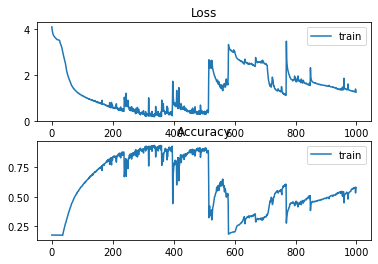

(109232, 14) (54608, 14) (109232, 6) (54608, 6)
3414/3414 [==============================] - 3s 728us/step - loss: 3.5375 - accuracy: 0.1740
Train: 0.174, Test: 0.175


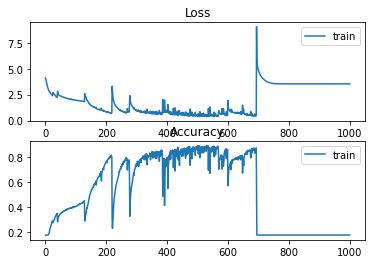

(109232, 14) (54608, 14) (109232, 6) (54608, 6)
3414/3414 [==============================] - 3s 729us/step - loss: 3.5366 - accuracy: 0.1743
Train: 0.174, Test: 0.174


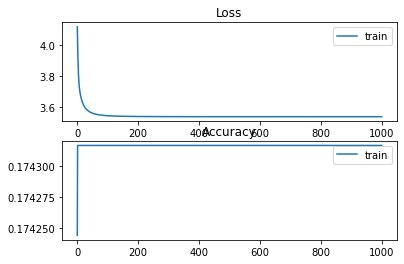

(109232, 14) (54608, 14) (109232, 6) (54608, 6)
3414/3414 [==============================] - 3s 725us/step - loss: 3.5374 - accuracy: 0.1736
Train: 0.174, Test: 0.175


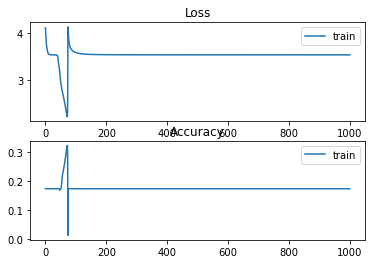

(109232, 14) (54608, 14) (109232, 6) (54608, 6)
3414/3414 [==============================] - 3s 733us/step - loss: 0.0213 - accuracy: 0.9931
Train: 0.993, Test: 0.993


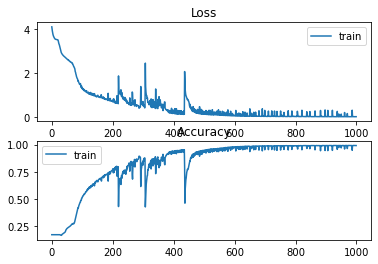

Class 0:
  Total: 9570
  Correct: 9570
  True 0: 9570
  False: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Accuracy: 0.9998955177097482
Class 1:
  Total: 268
  Correct: 268
  True 1: 268
  False: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Accuracy: 0.9962825278810409
Class 2:
  Total: 4062
  Correct: 4062
  True 2: 4062
  False: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Accuracy: 0.9997538764459759
Class 3:
  Total: 54
  Correct: 30
  True 3: 30
  False: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

3414/3414 [==============================] - 4s 1ms/step - loss: 0.0249 - accuracy: 0.9910
Epoch 2/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0245 - accuracy: 0.9911
Epoch 3/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0233 - accuracy: 0.9915
Epoch 4/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0245 - accuracy: 0.9910
Epoch 5/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0244 - accuracy: 0.9908
Epoch 6/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.2712 - accuracy: 0.9556
Epoch 7/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0645 - accuracy: 0.9793
Epoch 8/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0367 - accuracy: 0.9880
Epoch 9/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0277 - accuracy: 0.9907
Epoch 10/1000
3414/3414 [==============================] - 4s 1ms/step - loss

Epoch 79/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0224 - accuracy: 0.9917
Epoch 80/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.2429 - accuracy: 0.9602
Epoch 81/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0393 - accuracy: 0.9879
Epoch 82/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0262 - accuracy: 0.9913
Epoch 83/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0231 - accuracy: 0.9921
Epoch 84/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0228 - accuracy: 0.9925
Epoch 85/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0220 - accuracy: 0.9925
Epoch 86/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0223 - accuracy: 0.9923
Epoch 87/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0216 - accuracy: 0.9924
Epoch 88/1000
3414/3414 [==============================

3414/3414 [==============================] - 4s 1ms/step - loss: 0.0204 - accuracy: 0.9928
Epoch 234/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0198 - accuracy: 0.9929
Epoch 235/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0207 - accuracy: 0.9925
Epoch 236/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0212 - accuracy: 0.9924
Epoch 237/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0192 - accuracy: 0.9931
Epoch 238/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0201 - accuracy: 0.9928
Epoch 239/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0192 - accuracy: 0.9928
Epoch 240/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0194 - accuracy: 0.9928
Epoch 241/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0201 - accuracy: 0.9925
Epoch 242/1000
3414/3414 [==============================] - 4

3414/3414 [==============================] - 4s 1ms/step - loss: 0.3867 - accuracy: 0.9519
Epoch 388/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0409 - accuracy: 0.9874
Epoch 389/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0217 - accuracy: 0.9932
Epoch 390/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0196 - accuracy: 0.9940
Epoch 391/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0188 - accuracy: 0.9942
Epoch 392/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0188 - accuracy: 0.9941
Epoch 393/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0186 - accuracy: 0.9939
Epoch 394/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0182 - accuracy: 0.9942
Epoch 395/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0182 - accuracy: 0.9938
Epoch 396/1000
3414/3414 [==============================] - 4

3414/3414 [==============================] - 4s 1ms/step - loss: 0.0148 - accuracy: 0.9949
Epoch 542/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0149 - accuracy: 0.9949
Epoch 543/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0156 - accuracy: 0.9943
Epoch 544/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0160 - accuracy: 0.9944
Epoch 545/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0165 - accuracy: 0.9939
Epoch 546/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0151 - accuracy: 0.9947
Epoch 547/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0149 - accuracy: 0.9946
Epoch 548/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0194 - accuracy: 0.9929
Epoch 549/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0162 - accuracy: 0.9941
Epoch 550/1000
3414/3414 [==============================] - 4

3414/3414 [==============================] - 3s 972us/step - loss: 0.0153 - accuracy: 0.9950
Epoch 696/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.1986 - accuracy: 0.9637
Epoch 697/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0247 - accuracy: 0.9916
Epoch 698/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0153 - accuracy: 0.9951
Epoch 699/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0135 - accuracy: 0.9956
Epoch 700/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0129 - accuracy: 0.9959
Epoch 701/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 702/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0126 - accuracy: 0.9959
Epoch 703/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0122 - accuracy: 0.9961
Epoch 704/1000
3414/3414 [==============================] -

3414/3414 [==============================] - 4s 1ms/step - loss: 0.0963 - accuracy: 0.9758
Epoch 850/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0281 - accuracy: 0.9914
Epoch 851/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0136 - accuracy: 0.9951
Epoch 852/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0114 - accuracy: 0.9963
Epoch 853/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0119 - accuracy: 0.9960
Epoch 854/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0112 - accuracy: 0.9962
Epoch 855/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0119 - accuracy: 0.9956
Epoch 856/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0112 - accuracy: 0.9960
Epoch 857/1000
3414/3414 [==============================] - 4s 1ms/step - loss: 0.0110 - accuracy: 0.9961
Epoch 858/1000
3414/3414 [==============================] - 4

In [6]:
train_acc = 0
while(train_acc < 0.98):
    import tensorflow as tf
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    import pickle
    from matplotlib import pyplot
    from keras.optimizers import SGD
    np.set_printoptions(threshold=np.sys.maxsize) 
    
    #define the data
    FullData = pd.read_csv("ALU_Correction_Data.csv")

    for item in range(0,len(FullData)):
        FullData.loc[item,"carry"] = str(FullData.loc[item,"carry"])

    x, y = FullData.values[:, 2:-6], FullData.values[:, -6:]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3333)
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    n_features = x_train.shape[1]
    
    outtypetrain = []
    outtypetest = []

    for item in range(0,len(y_train)):
        outtypetrain.append(y_train[item][0] + y_train[item][1] + y_train[item][2] + y_train[item][3] + y_train[item][4] + y_train[item][5])

    for item in range(0,len(y_test)):  
        outtypetest.append(y_test[item][0] + y_test[item][1] + y_test[item][2] + y_test[item][3] + y_test[item][4] + y_test[item][5])
    
    y_trainpreclass = outtypetrain
    y_testpreclass = outtypetest

    for item in range(0,len(y_train)):
        if(outtypetrain[item] == '000000'):
            y_trainpreclass[item] = 0
        elif(outtypetrain[item] == '000001'):
            y_trainpreclass[item] = 1
        elif(outtypetrain[item] == '000010'):
            y_trainpreclass[item] = 2
        elif(outtypetrain[item] == '000011'):
            y_trainpreclass[item] = 3
        elif(outtypetrain[item] == '000100'):
            y_trainpreclass[item] = 4
        elif(outtypetrain[item] == '000101'):
            y_trainpreclass[item] = 5
        elif(outtypetrain[item] == '000110'):
            y_trainpreclass[item] = 6
        elif(outtypetrain[item] == '000111'):
            y_trainpreclass[item] = 7
        elif(outtypetrain[item] == '001000'):
            y_trainpreclass[item] = 8
        elif(outtypetrain[item] == '001001'):
            y_trainpreclass[item] = 9
        elif(outtypetrain[item] == '001010'):
            y_trainpreclass[item] = 10
        elif(outtypetrain[item] == '001011'):
            y_trainpreclass[item] = 11
        elif(outtypetrain[item] == '001100'):
            y_trainpreclass[item] = 12
        elif(outtypetrain[item] == '001101'):
            y_trainpreclass[item] = 13
        elif(outtypetrain[item] == '001110'):
            y_trainpreclass[item] = 14
        elif(outtypetrain[item] == '001111'):
            y_trainpreclass[item] = 15
        elif(outtypetrain[item] == '010000'):
            y_trainpreclass[item] = 16
        elif(outtypetrain[item] == '010001'):
            y_trainpreclass[item] = 17
        elif(outtypetrain[item] == '010010'):
            y_trainpreclass[item] = 18
        elif(outtypetrain[item] == '010011'):
            y_trainpreclass[item] = 19
        elif(outtypetrain[item] == '010100'):
            y_trainpreclass[item] = 20
        elif(outtypetrain[item] == '010101'):
            y_trainpreclass[item] = 21
        elif(outtypetrain[item] == '010110'):
            y_trainpreclass[item] = 22
        elif(outtypetrain[item] == '010111'):
            y_trainpreclass[item] = 23
        elif(outtypetrain[item] == '011000'):
            y_trainpreclass[item] = 24
        elif(outtypetrain[item] == '011001'):
            y_trainpreclass[item] = 25
        elif(outtypetrain[item] == '011010'):
            y_trainpreclass[item] = 26
        elif(outtypetrain[item] == '011011'):
            y_trainpreclass[item] = 27 
        elif(outtypetrain[item] == '011100'):
            y_trainpreclass[item] = 28
        elif(outtypetrain[item] == '011101'):
            y_trainpreclass[item] = 29
        elif(outtypetrain[item] == '011110'):
            y_trainpreclass[item] = 30
        elif(outtypetrain[item] == '011111'):
            y_trainpreclass[item] = 31
        elif(outtypetrain[item] == '100000'):
            y_trainpreclass[item] = 32
        elif(outtypetrain[item] == '100001'):
            y_trainpreclass[item] = 33
        elif(outtypetrain[item] == '100010'):
            y_trainpreclass[item] = 34
        elif(outtypetrain[item] == '100011'):
            y_trainpreclass[item] = 35
        elif(outtypetrain[item] == '100100'):
            y_trainpreclass[item] = 36
        elif(outtypetrain[item] == '100101'):
            y_trainpreclass[item] = 37
        elif(outtypetrain[item] == '100110'):
            y_trainpreclass[item] = 38
        elif(outtypetrain[item] == '100111'):
            y_trainpreclass[item] = 39
        elif(outtypetrain[item] == '101000'):
            y_trainpreclass[item] = 40
        elif(outtypetrain[item] == '101001'):
            y_trainpreclass[item] = 41
        elif(outtypetrain[item] == '101010'):
            y_trainpreclass[item] = 42
        elif(outtypetrain[item] == '101011'):
            y_trainpreclass[item] = 43
        elif(outtypetrain[item] == '101100'):
            y_trainpreclass[item] = 44
        elif(outtypetrain[item] == '101101'):
            y_trainpreclass[item] = 45
        elif(outtypetrain[item] == '101110'):
            y_trainpreclass[item] = 46
        elif(outtypetrain[item] == '101111'):
            y_trainpreclass[item] = 47
        elif(outtypetrain[item] == '110000'):
            y_trainpreclass[item] = 48
        elif(outtypetrain[item] == '110001'):
            y_trainpreclass[item] = 49
        elif(outtypetrain[item] == '110010'):
            y_trainpreclass[item] = 50
        elif(outtypetrain[item] == '110011'):
            y_trainpreclass[item] = 51
        elif(outtypetrain[item] == '110100'):
            y_trainpreclass[item] = 52
        elif(outtypetrain[item] == '110101'):
            y_trainpreclass[item] = 53
        elif(outtypetrain[item] == '110110'):
            y_trainpreclass[item] = 54
        elif(outtypetrain[item] == '110111'):
            y_trainpreclass[item] = 55
        elif(outtypetrain[item] == '111000'):
            y_trainpreclass[item] = 56
        elif(outtypetrain[item] == '111001'):
            y_trainpreclass[item] = 57
        elif(outtypetrain[item] == '111010'):
            y_trainpreclass[item] = 58
        elif(outtypetrain[item] == '111011'):
            y_trainpreclass[item] = 59
        elif(outtypetrain[item] == '111100'):
            y_trainpreclass[item] = 60
        elif(outtypetrain[item] == '111101'):
            y_trainpreclass[item] = 61
        elif(outtypetrain[item] == '111110'):
            y_trainpreclass[item] = 62
        elif(outtypetrain[item] == '111111'):
            y_trainpreclass[item] = 63
        elif(outtypetrain[item] == 'xxxxx0'):
            y_trainpreclass[item] = 64

    for item in range(0,len(y_test)):
        if(outtypetest[item] == '000000'):
            y_testpreclass[item] = 0
        elif(outtypetest[item] == '000001'):
            y_testpreclass[item] = 1
        elif(outtypetest[item] == '000010'):
            y_testpreclass[item] = 2
        elif(outtypetest[item] == '000011'):
            y_testpreclass[item] = 3
        elif(outtypetest[item] == '000100'):
            y_testpreclass[item] = 4
        elif(outtypetest[item] == '000101'):
            y_testpreclass[item] = 5
        elif(outtypetest[item] == '000110'):
            y_testpreclass[item] = 6
        elif(outtypetest[item] == '000111'):
            y_testpreclass[item] = 7
        elif(outtypetest[item] == '001000'):
            y_testpreclass[item] = 8
        elif(outtypetest[item] == '001001'):
            y_testpreclass[item] = 9
        elif(outtypetest[item] == '001010'):
            y_testpreclass[item] = 10
        elif(outtypetest[item] == '001011'):
            y_testpreclass[item] = 11
        elif(outtypetest[item] == '001100'):
            y_testpreclass[item] = 12
        elif(outtypetest[item] == '001101'):
            y_testpreclass[item] = 13
        elif(outtypetest[item] == '001110'):
            y_testpreclass[item] = 14
        elif(outtypetest[item] == '001111'):
            y_testpreclass[item] = 15
        elif(outtypetest[item] == '010000'):
            y_testpreclass[item] = 16
        elif(outtypetest[item] == '010001'):
            y_testpreclass[item] = 17
        elif(outtypetest[item] == '010010'):
            y_testpreclass[item] = 18
        elif(outtypetest[item] == '010011'):
            y_testpreclass[item] = 19
        elif(outtypetest[item] == '010100'):
            y_testpreclass[item] = 20
        elif(outtypetest[item] == '010101'):
            y_testpreclass[item] = 21
        elif(outtypetest[item] == '010110'):
            y_testpreclass[item] = 22
        elif(outtypetest[item] == '010111'):
            y_testpreclass[item] = 23
        elif(outtypetest[item] == '011000'):
            y_testpreclass[item] = 24
        elif(outtypetest[item] == '011001'):
            y_testpreclass[item] = 25
        elif(outtypetest[item] == '011010'):
            y_testpreclass[item] = 26
        elif(outtypetest[item] == '011011'):
            y_testpreclass[item] = 27 
        elif(outtypetest[item] == '011100'):
            y_testpreclass[item] = 28
        elif(outtypetest[item] == '011101'):
            y_testpreclass[item] = 29
        elif(outtypetest[item] == '011110'):
            y_testpreclass[item] = 30
        elif(outtypetest[item] == '011111'):
            y_testpreclass[item] = 31
        elif(outtypetest[item] == '100000'):
            y_testpreclass[item] = 32
        elif(outtypetest[item] == '100001'):
            y_testpreclass[item] = 33
        elif(outtypetest[item] == '100010'):
            y_testpreclass[item] = 34
        elif(outtypetest[item] == '100011'):
            y_testpreclass[item] = 35
        elif(outtypetest[item] == '100100'):
            y_testpreclass[item] = 36
        elif(outtypetest[item] == '100101'):
            y_testpreclass[item] = 37
        elif(outtypetest[item] == '100110'):
            y_testpreclass[item] = 38
        elif(outtypetest[item] == '100111'):
            y_testpreclass[item] = 39
        elif(outtypetest[item] == '101000'):
            y_testpreclass[item] = 40
        elif(outtypetest[item] == '101001'):
            y_testpreclass[item] = 41
        elif(outtypetest[item] == '101010'):
            y_testpreclass[item] = 42
        elif(outtypetest[item] == '101011'):
            y_testpreclass[item] = 43
        elif(outtypetest[item] == '101100'):
            y_testpreclass[item] = 44
        elif(outtypetest[item] == '101101'):
            y_testpreclass[item] = 45
        elif(outtypetest[item] == '101110'):
            y_testpreclass[item] = 46
        elif(outtypetest[item] == '101111'):
            y_testpreclass[item] = 47
        elif(outtypetest[item] == '110000'):
            y_testpreclass[item] = 48
        elif(outtypetest[item] == '110001'):
            y_testpreclass[item] = 49
        elif(outtypetest[item] == '110010'):
            y_testpreclass[item] = 50
        elif(outtypetest[item] == '110011'):
            y_testpreclass[item] = 51
        elif(outtypetest[item] == '110100'):
            y_testpreclass[item] = 52
        elif(outtypetest[item] == '110101'):
            y_testpreclass[item] = 53
        elif(outtypetest[item] == '110110'):
            y_testpreclass[item] = 54
        elif(outtypetest[item] == '110111'):
            y_testpreclass[item] = 55
        elif(outtypetest[item] == '111000'):
            y_testpreclass[item] = 56
        elif(outtypetest[item] == '111001'):
            y_testpreclass[item] = 57
        elif(outtypetest[item] == '111010'):
            y_testpreclass[item] = 58
        elif(outtypetest[item] == '111011'):
            y_testpreclass[item] = 59
        elif(outtypetest[item] == '111100'):
            y_testpreclass[item] = 60
        elif(outtypetest[item] == '111101'):
            y_testpreclass[item] = 61
        elif(outtypetest[item] == '111110'):
            y_testpreclass[item] = 62
        elif(outtypetest[item] == '111111'):
            y_testpreclass[item] = 63
        elif(outtypetest[item] == 'xxxxx0'):
            y_testpreclass[item] = 64

    
    # one hot encode output variable
    y_traininput = tf.keras.utils.to_categorical(y_trainpreclass)
    y_testinput = tf.keras.utils.to_categorical(y_testpreclass)  
    
    x_train = np.asarray(x_train).astype('float32')
    x_test = np.asarray(x_test).astype('float32')
    y_traininput = np.asarray(y_traininput).astype('float32')
    y_testinput = np.asarray(y_testinput).astype('float32')

    
    # define the model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, input_shape=(n_features,), activation= "relu"))
    model.add(tf.keras.layers.Dense(80, activation= "relu"))
    model.add(tf.keras.layers.Dense(80, activation= "relu"))
    model.add(tf.keras.layers.Dense(80, activation= "relu"))
    model.add(tf.keras.layers.Dense(30, activation= "relu"))
    model.add(tf.keras.layers.Dense(30, activation= "relu"))
    model.add(tf.keras.layers.Dense(30, activation= "relu"))
    model.add(tf.keras.layers.Dense(30, activation= "relu"))
    model.add(tf.keras.layers.Dense(10, activation= "relu"))
    model.add(tf.keras.layers.Dense(10, activation= "relu"))
    model.add(tf.keras.layers.Dense(10, activation= "relu"))
    model.add(tf.keras.layers.Dense(5, activation= "relu"))
    model.add(tf.keras.layers.Dense(5, activation= "relu"))
    model.add(tf.keras.layers.Dense(5, activation= "relu"))
    model.add(tf.keras.layers.Dense(5, activation= "relu"))
    model.add(tf.keras.layers.Dense(5, activation= "relu"))
    model.add(tf.keras.layers.Dense(65, activation='softmax'))

    opt = SGD(lr=0.001)

    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    history = model.fit(x_train, y_traininput, epochs=1000, verbose=0)
    _, train_acc = model.evaluate(x_train, y_traininput, verbose=1)
    _, test_acc = model.evaluate(x_test, y_testinput, verbose=0)
    
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # plot loss during training
    pyplot.subplot(211)
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.legend()
    # plot accuracy during training
    pyplot.subplot(212)
    pyplot.title('Accuracy')
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.legend()
    pyplot.show()

    predictions = model.predict(x_test)
    y_pred_classes = np.argmax(predictions, axis=1)
    
    # compute class-wise accuracy and confusion matrix
    class_correct = [0] * 65
    class_total = [0] * 65
    class_true = [0] * 65
    class_false = [[0] * 65 for _ in range(65)]

    for i in range(len(y_test)):
        true_class = y_testpreclass[i]
        pred_class = y_pred_classes[i]

        if true_class == pred_class:
            class_correct[true_class] += 1
            class_true[true_class] += 1
        else:
            class_false[true_class][pred_class] += 1

        class_total[true_class] += 1

    class_accuracy = [class_correct[i] / (class_total[i] + 1) for i in range(65)]

    # print class-wise results
    if(train_acc > 0.95):
        for class_id in range(65):
            print(f"Class {class_id}:")
            print(f"  Total: {class_total[class_id]}")
            print(f"  Correct: {class_correct[class_id]}")
            print(f"  True {class_id}: {class_true[class_id]}")
            print(f"  False: {class_false[class_id]}")
            print(f"  Accuracy: {class_accuracy[class_id]}")

history = model.fit(x_train, y_traininput, epochs=1000, verbose=1)

Train: 1.000, Test: 0.999


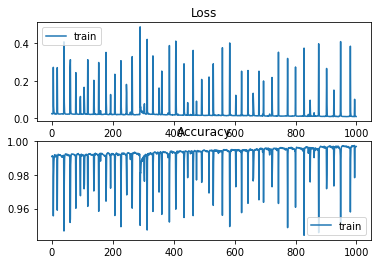

In [15]:
_, train_acc = model.evaluate(x_train, y_traininput, verbose=0)
_, test_acc = model.evaluate(x_test, y_testinput, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

In [21]:
with open('ALUCorrectionmodel.pkl', 'wb') as f:
    pickle.dump({'weights': model.get_weights(), 'history': history.history}, f)

In [18]:
# load the weights and history from the file and evaluate the model
with open('ALUCorrectionmodel.pkl', 'rb') as f:
    data = pickle.load(f)
model.set_weights(data['weights'])

In [19]:
history = model.fit(x_train, y_traininput, epochs=50, verbose=1)

Epoch 1/50
3414/3414 [==============================] - 3s 999us/step - loss: 8.7347e-04 - accuracy: 1.0000
Epoch 2/50
3414/3414 [==============================] - 3s 992us/step - loss: 8.5445e-04 - accuracy: 1.0000
Epoch 3/50
3414/3414 [==============================] - 3s 993us/step - loss: 8.4844e-04 - accuracy: 1.0000
Epoch 4/50
3414/3414 [==============================] - 3s 1ms/step - loss: 8.3883e-04 - accuracy: 1.0000
Epoch 5/50
3414/3414 [==============================] - 3s 1ms/step - loss: 8.5091e-04 - accuracy: 1.0000
Epoch 6/50
3414/3414 [==============================] - 3s 1ms/step - loss: 8.7500e-04 - accuracy: 1.0000
Epoch 7/50
3414/3414 [==============================] - 3s 999us/step - loss: 8.2208e-04 - accuracy: 1.0000
Epoch 8/50
 500/3414 [===>..........................] - ETA: 2s - loss: 9.2210e-04 - accuracy: 1.0000

KeyboardInterrupt: 

In [20]:
predictions = model.predict(x_test)
y_pred_classes = np.argmax(predictions, axis=1)
    
    # compute class-wise accuracy and confusion matrix
class_correct = [0] * 65
class_total = [0] * 65
class_true = [0] * 65
class_false = [[0] * 65 for _ in range(65)]

for i in range(len(y_test)):
    true_class = y_testpreclass[i]
    pred_class = y_pred_classes[i]

    if true_class == pred_class:
        class_correct[true_class] += 1
        class_true[true_class] += 1
    else:
        class_false[true_class][pred_class] += 1

    class_total[true_class] += 1

class_accuracy = [class_correct[i] / (class_total[i]) for i in range(65)]
    
for class_id in range(65):
            print(f"Class {class_id}:")
            #print(f"  Total: {class_total[class_id]}")
            #print(f"  Correct: {class_correct[class_id]}")
            #print(f"  True {class_id}: {class_true[class_id]}")
            #print(f"  False: {class_false[class_id]}")
            print(f"  Accuracy: {class_accuracy[class_id]}")

Class 0:
  Accuracy: 1.0
Class 1:
  Accuracy: 1.0
Class 2:
  Accuracy: 1.0
Class 3:
  Accuracy: 1.0
Class 4:
  Accuracy: 1.0
Class 5:
  Accuracy: 1.0
Class 6:
  Accuracy: 1.0
Class 7:
  Accuracy: 1.0
Class 8:
  Accuracy: 1.0
Class 9:
  Accuracy: 1.0
Class 10:
  Accuracy: 1.0
Class 11:
  Accuracy: 1.0
Class 12:
  Accuracy: 1.0
Class 13:
  Accuracy: 1.0
Class 14:
  Accuracy: 1.0
Class 15:
  Accuracy: 1.0
Class 16:
  Accuracy: 1.0
Class 17:
  Accuracy: 1.0
Class 18:
  Accuracy: 1.0
Class 19:
  Accuracy: 1.0
Class 20:
  Accuracy: 1.0
Class 21:
  Accuracy: 1.0
Class 22:
  Accuracy: 1.0
Class 23:
  Accuracy: 1.0
Class 24:
  Accuracy: 1.0
Class 25:
  Accuracy: 1.0
Class 26:
  Accuracy: 1.0
Class 27:
  Accuracy: 1.0
Class 28:
  Accuracy: 1.0
Class 29:
  Accuracy: 1.0
Class 30:
  Accuracy: 1.0
Class 31:
  Accuracy: 1.0
Class 32:
  Accuracy: 1.0
Class 33:
  Accuracy: 1.0
Class 34:
  Accuracy: 1.0
Class 35:
  Accuracy: 1.0
Class 36:
  Accuracy: 1.0
Class 37:
  Accuracy: 1.0
Class 38:
  Accuracy: 